<a href="https://colab.research.google.com/github/Sony-Dodla/ADM_LAB/blob/main/ADM_LAB_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
np.random.seed(42)
data=np.random.normal(0,1,100)
outliers=np.random.uniform(5,10,5)

In [3]:
print(outliers)

[7.08705502 6.11053905 5.59932684 6.68807586 9.71454852]


In [4]:
print(data.shape)

(100,)


In [5]:
data_with_outliers=np.concatenate([data,outliers])
df=pd.DataFrame(data_with_outliers,columns=['Value'])

In [6]:
Q1=df['Value'].quantile(0.25)
Q3=df['Value'].quantile(0.75)
IQR=Q3-Q1
lower_bond=Q1-1.5*IQR
upper_bond=Q3+1.5*IQR

In [7]:
print(IQR)
print(lower_bond)
print(upper_bond)

1.1739638180818406
-2.3232332563637335
2.372622015963629


In [8]:
outliers_iqr=df[(df['Value']<lower_bond)|(df['Value']>upper_bond)]

In [9]:
z_scores=stats.zscore(df['Value'])
outliers_zscore=df[np.abs(z_scores)>3]

In [10]:
print(outliers_zscore)

        Value
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549


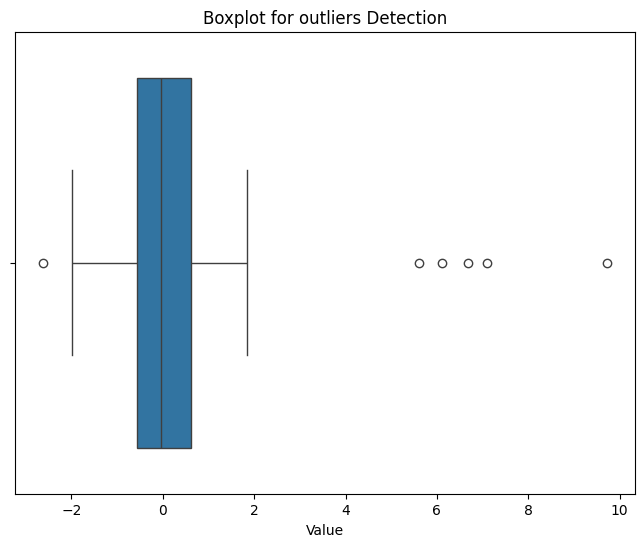

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Value'])
plt.title("Boxplot for outliers Detection")
plt.show()

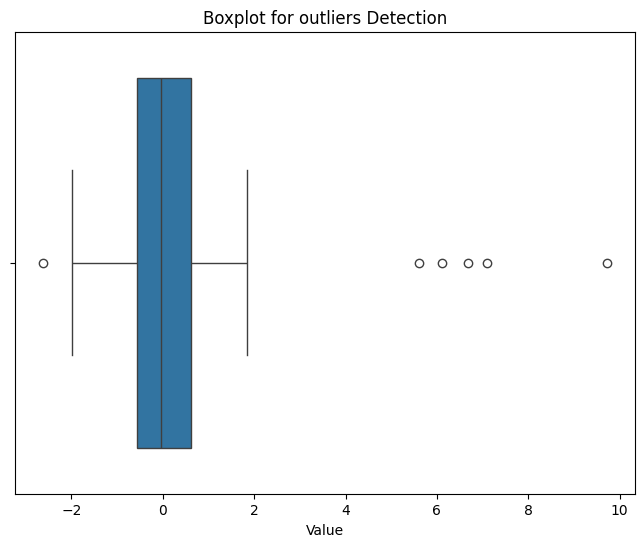

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Value'])
plt.title("Boxplot for outliers Detection")
plt.show()

In [13]:
df_capped=df.copy()
df_capped['Value']=np.clip(df_capped['Value'],lower_bond,upper_bond)

In [14]:
print(df_capped)

        Value
0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
..        ...
100  2.372622
101  2.372622
102  2.372622
103  2.372622
104  2.372622

[105 rows x 1 columns]


In [15]:
df_removed=df.copy()
df_removed=df_removed[(df_removed['Value']>=lower_bond) & (df_removed['Value']<=upper_bond)]

In [16]:
print(df_removed)

       Value
0   0.496714
1  -0.138264
2   0.647689
3   1.523030
4  -0.234153
..       ...
95 -1.463515
96  0.296120
97  0.261055
98  0.005113
99 -0.234587

[99 rows x 1 columns]


In [17]:
print(df_removed)

       Value
0   0.496714
1  -0.138264
2   0.647689
3   1.523030
4  -0.234153
..       ...
95 -1.463515
96  0.296120
97  0.261055
98  0.005113
99 -0.234587

[99 rows x 1 columns]


In [18]:
df_imputed=df.copy()
median_value=df['Value'].median()
df_imputed['Value']=np.where((df_imputed['Value']<lower_bond)| (df_imputed['Value']>upper_bond),median_value,df_imputed['Value'])

In [19]:
print(df_imputed)

        Value
0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
..        ...
100 -0.035826
101 -0.035826
102 -0.035826
103 -0.035826
104 -0.035826

[105 rows x 1 columns]


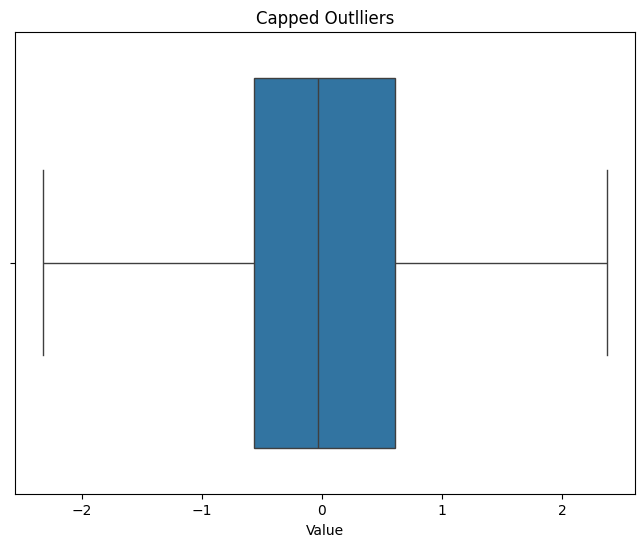

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_capped['Value'])
plt.title("Capped Outlliers")
plt.show()

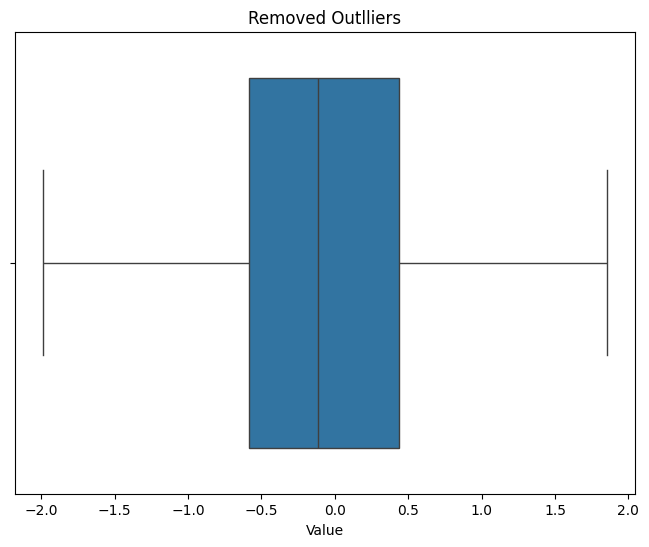

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_removed['Value'])
plt.title("Removed Outlliers")
plt.show()

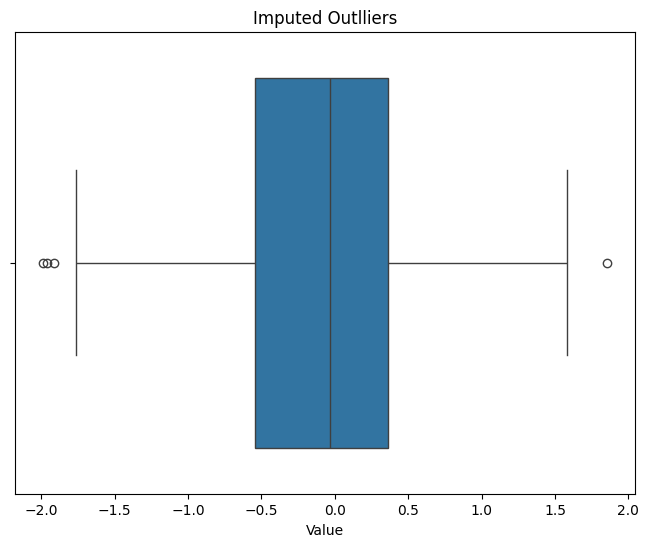

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_imputed['Value'])
plt.title("Imputed Outlliers")
plt.show()

In [23]:
print(f"Outliers detected using IQR: \n{outliers_iqr}")
print(f"Outliers detected using Z-score: \n{outliers_zscore}")

Outliers detected using IQR: 
        Value
74  -2.619745
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
Outliers detected using Z-score: 
        Value
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
